In [353]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [354]:
# import danych 
data = pd.read_csv("iris.data", header=None)

In [355]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [356]:
#dodanie nazw kolumn
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']

In [357]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [358]:
#wyodrębioenie etykiet
X, y = np.split(data,[-1],axis=1) 


In [359]:
y["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [360]:
#zamiana zmiennych kategorycznych na numeryczne 
change_species = {"species": {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}}

y = y.replace(change_species)
y["species"].unique()

array([0, 1, 2], dtype=int64)

In [361]:
# podział zbioru na treningowy i testowy 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [362]:
# iteracyjne uczenie modelu drzewa klasyfikacji dla maksymalnej liczby węzłów od 2 do 100
list_training_error = []
list_testing_error = []

for max_leaf_nodes in range(2,101):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    training_error = mean_absolute_error(y_train, y_train_pred) 
    testing_error = mean_absolute_error(y_test, y_test_pred)
    list_training_error.append(training_error)
    list_testing_error.append(testing_error)
    

   

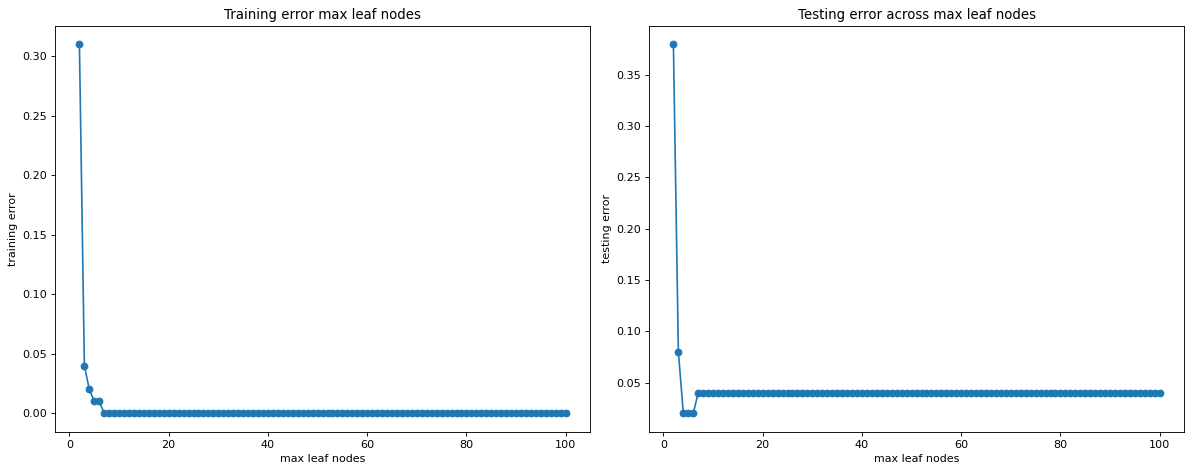

In [363]:
# wykres średniego błędu dla zbioru treningowego oraz testowego w zależności od liczby makymalnej liczby węzłów 
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(range(2, 101 ), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('max leaf nodes')
plt.ylabel('training error')
plt.title('Training error max leaf nodes')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(2, 101 ), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('max leaf nodes')
plt.ylabel('testing error')
plt.title('Testing error across max leaf nodes')
plt.tight_layout()
plt.show()

In [351]:
#Wnioski:
#Gdy wybierzemy do modelu maksymalną ilość węzłów 2, to mamy niedoszacowanie modelu, gdyż średni błąd na zbiorze 
#treningowym, jak i testowym jest wysoki (ponad 0.3).
# Jak jest duża liczba maksymalnej liczby węzłów,tj. powyżej 10, to średni błąd na zbiorze treningowym jest mniejszy, 
#niż na zbiorze testowym, co świadczy o przeszacowaniu modelu. 

